# Polynomial Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [10]:
# reading in data
df = pd.read_csv("prediction_ready.csv", parse_dates=["start_time"])

In [11]:
# overview
df.head()

,start_time,month,day,hour,mean_duration,max_temp,precip,trips,isWeekday
0,2016-01-01 00:00:00,1.0,1.0,0.0,13.200000,-4.4,0.0,25,0
1,2016-01-01 01:00:00,1.0,1.0,1.0,10.195122,-5.0,0.0,41,0
2,2016-01-01 02:00:00,1.0,1.0,2.0,10.461538,-5.0,0.0,39,0
3,2016-01-01 03:00:00,1.0,1.0,3.0,15.388889,-5.6,0.0,18,0
4,2016-01-01 04:00:00,1.0,1.0,4.0,45.700000,-5.0,0.0,10,0


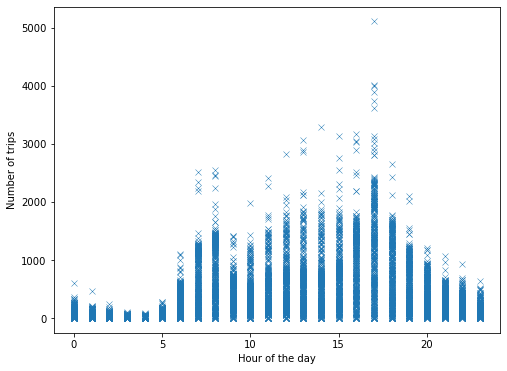

In [12]:
# non-linear relationship
plt.figure(figsize=(8,6))
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
sns.scatterplot(data=df,x="hour" ,y="trips",marker="x")
plt.show()

In [21]:
# function for polynomial regression for one feature (hour)
def plot_regression_poly_scikit(X,y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour of day")
    plt.ylabel("Number of Trips")
    plt.xlim([X.min()-0.25,X.max()+0.25]) # leave some space before and after limits
    plt.ylim(ylim)
    print("MSE: "+str(mean_squared_error(y,lin_reg_Poly.predict(x_poly))))
    print("MAE: "+str(mean_absolute_error(y,lin_reg_Poly.predict(x_poly))))
    print ('The R^2 for quadratic curve is: ',r2_score(y, model_pred))
    print(lin_reg_Poly.coef_)

MSE: 226506.66597636294
MAE: 354.3473778335607
The R^2 for quadratic curve is:  0.07249422387726245
[ 0.         19.22164647]


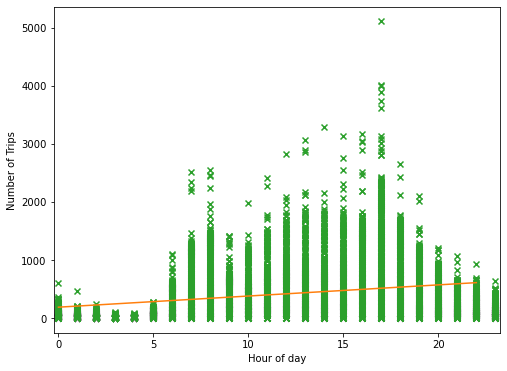

In [22]:
plot_regression_poly_scikit(X =df["hour"].values, y=df["trips"].values, d = 1)

MSE: 159585.94350383957
MAE: 267.79656829797887
The R^2 for quadratic curve is:  0.34652305374865056
[ 0.00000000e+00 -5.01257540e+01  1.08803129e+02 -9.80735293e+01
  3.58155526e+01 -6.39837433e+00  6.32251363e-01 -3.62480631e-02
  1.19395011e-03 -2.07872535e-05  1.46293196e-07]


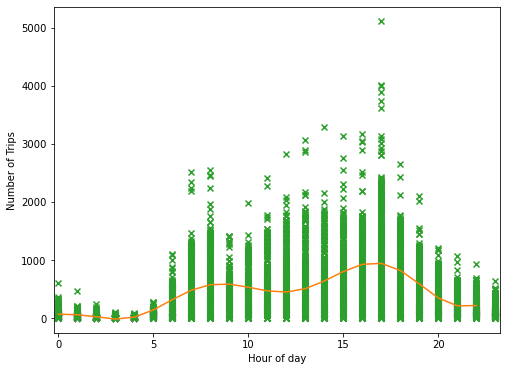

In [25]:
# highest R^2
plot_regression_poly_scikit(X = df["hour"].values, y =df["trips"].values, d = 10)


MSE: 159589.89970603064
MAE: 269.099610989181
The R^2 for quadratic curve is:  0.34650685378222623
[ 0.00000000e+00  6.02256706e+01 -9.66846191e-01 -5.91685848e+01
  3.06436944e+01 -6.57024992e+00  7.71080413e-01 -5.50334272e-02
  2.49354255e-03 -7.15481031e-05  1.21096770e-06 -9.34618782e-09]


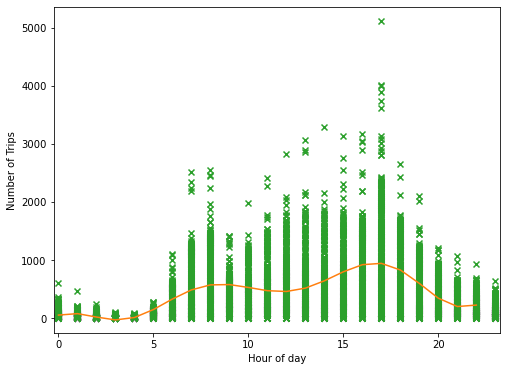

In [26]:
plot_regression_poly_scikit(X = df["hour"].values, y =df["trips"].values, d = 11)